In [1]:
import tensorflow as tf

# setup a single GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')        
        gpu_config  = tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [gpu_config])
        
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPU


In [170]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [195]:
path = "C:/Users/Andrea Torcianti/Maschinenbau/Udemy/Techlabs/project/data"

In [196]:
#this code checks if the data is ok 
from pathlib import Path
import imghdr


image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [197]:
# Set the batch size and image size
batch_size = 2
img_size = (224, 224)

# Set the directory containing the images
data_dir = path

# Create a training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)


# Create a validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)


Found 41 files belonging to 2 classes.
Using 33 files for training.
Found 41 files belonging to 2 classes.
Using 8 files for validation.


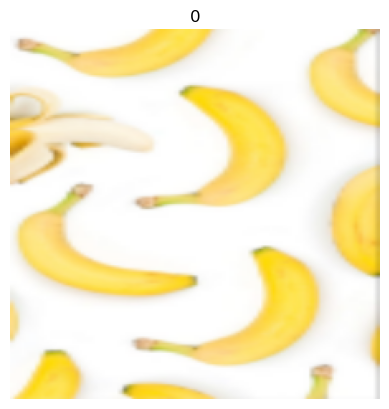

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# Take the first batch of images and labels
for images, labels in train_ds.take(1):
    # Convert batch to NumPy array
    np_images = images.numpy()
    np_labels = labels.numpy()

# Plot the first image in the array
plt.imshow(np_images[0].astype('uint8'))
plt.axis('off')
plt.title(np_labels[0])
plt.show()


In [199]:
train_ds.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [200]:
#normalize the dataset
def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

In [201]:
# Take the first batch of images and labels
for images, labels in train_ds.take(1):
    print(images.shape)
    print(images[0])

(2, 224, 224, 3)
tf.Tensor(
[[[0.5764706  0.5058824  0.3254902 ]
  [0.5738095  0.5018907  0.31883755]
  [0.56680673 0.49138656 0.30133054]
  ...
  [0.59901935 0.48921543 0.19901937]
  [0.64803874 0.53823483 0.24803874]
  [0.6666667  0.5568628  0.26666668]]

 [[0.56516105 0.4952381  0.31085435]
  [0.56340283 0.49192363 0.3052174 ]
  [0.558776   0.4832014  0.29038334]
  ...
  [0.58362323 0.4727442  0.18520917]
  [0.6278907  0.51730865 0.22977367]
  [0.64471287 0.5342437  0.24670868]]

 [[0.53539914 0.46722686 0.27233893]
  [0.5360169  0.4656944  0.26937497]
  [0.53764254 0.46166155 0.26157495]
  ...
  [0.5431071  0.42939878 0.14886656]
  [0.57486963 0.4622399  0.18170768]
  [0.5869398  0.47471988 0.19418767]]

 ...

 [[0.67454493 0.5568979  0.12069337]
  [0.6718779  0.5559712  0.12600955]
  [0.6648594  0.5535327  0.13999946]
  ...
  [0.5212019  0.4153196  0.3015941 ]
  [0.49870867 0.39282632 0.2791008 ]
  [0.49016094 0.3842786  0.2705531 ]]

 [[0.6517859  0.53413886 0.10143577]
  [0.6529

In [202]:
data_augmentation = tf.keras.Sequential([
tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
tf.keras.layers.RandomRotation(factor=0.05, seed=42),
tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

In [203]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(2, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [204]:
for images, labels in train_ds.take(1):
    print(images.shape)
    print(images[0])

(2, 224, 224, 3)
tf.Tensor(
[[[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [0.9960

In [205]:
#freeze the layers
for layer in base_model.layers:
    layer.trainable = False

In [206]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
metrics=["accuracy"])
history = model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
17/17 [==============================] - 6s 212ms/step - loss: 0.5823 - accuracy: 0.8182 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
17/17 [==============================] - 1s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
17/17 [==============================] - 1s 49ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
